In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()
import math

In [81]:
def readData():
    data = pd.read_csv('HW_PCA_SHOPPING_CART_v896.csv')
    data = data.drop(['ID'], axis=1)
    # return np.array(data)
    print(type(data))
    return data
    

In [82]:
def K_Means_library(data):
    N_CLUSTERS = 6
    kmeans = KMeans(n_clusters = N_CLUSTERS, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(data)
    print(type(y_kmeans))
    temp = (y_kmeans == 0)
    print(data[y_kmeans == 0, 0])

In [83]:
def visualize():
    index_x = 0
    index_y = 8
    plt.scatter(data[y_kmeans == 0, index_x], data[y_kmeans == 0, index_y], s = 100, c = 'red', label = 'Cluster 1')
    plt.scatter(data[y_kmeans == 1, index_x], data[y_kmeans == 1, index_y], s = 100, c = 'blue', label = 'Cluster 2')
    plt.scatter(data[y_kmeans == 2, index_x], data[y_kmeans == 2, index_y], s = 100, c = 'green', label = 'Cluster 3')
    plt.scatter(data[y_kmeans == 3, index_x], data[y_kmeans == 3, index_y], s = 100, c = 'cyan', label = 'Cluster 4')
    plt.scatter(data[y_kmeans == 4, index_x], data[y_kmeans == 4, index_y], s = 100, c = 'magenta', label = 'Cluster 5')
    plt.scatter(data[y_kmeans == 5, index_x], data[y_kmeans == 5, index_y], s = 100, c = 'orange', label = 'Cluster 6')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
    plt.title('Clusters of Customers')
    plt.legend()
    plt.show()
    

[0.29584347 0.23120945 0.14347547 0.094025   0.05185952 0.01918474
 0.01769707 0.01548361 0.01501349 0.01408254 0.01326541 0.01209745
 0.01183716 0.01113276 0.01028947 0.01000069 0.00922528 0.00849791
 0.008094   0.00768551]


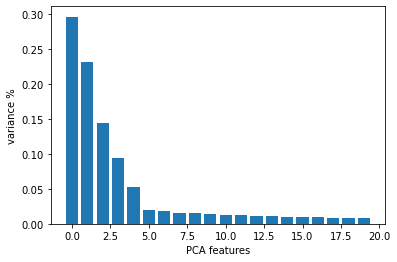

In [84]:
pca = PCA()
pca.fit(data)
print(pca.explained_variance_ratio_)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.show()

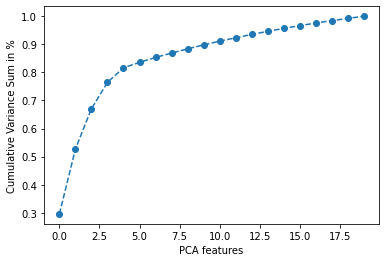

In [85]:
plt.plot(features, pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel("PCA features")
plt.ylabel("Cumulative Variance Sum in %")
plt.savefig('PCA feasure vs Cumulative Variance Sum.png')
plt.show()

In [92]:
pca = PCA(n_components=4)
pca.fit(data)
scores_pca = pca.transform(data)

N_CLUSTERS = 6
kmeans_pca = KMeans(n_clusters = N_CLUSTERS, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=6, random_state=42)

In [111]:
df_data_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_data_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_data_pca_kmeans['K-Means PCA'] = kmeans_pca.labels_
df_data_pca_kmeans['Segment'] = df_data_pca_kmeans['K-Means PCA'].map({0: 'first', 
                                                                       1: 'Second', 
                                                                       2: 'third',
                                                                       3: 'fourth'})

c:\users\ss042\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


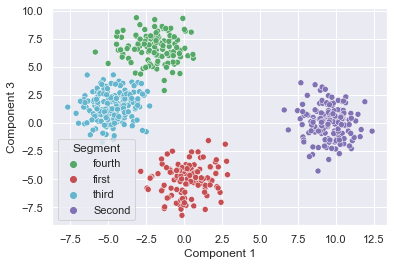

In [115]:
x_axis = df_data_pca_kmeans['Component 1']
y_axis = df_data_pca_kmeans['Component 3']
sns.scatterplot(x_axis, y_axis, hue = df_data_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm'])
plt.savefig('Cluster Visualization.png')
plt.show()

In [94]:
# plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

<class 'numpy.ndarray'>
[4 1 1 2 3 1 2 3 3 0 1 2 2 2 4 3 2 1 2 4 0 3 5 4 2 3 2 0 4 1 2 1 2 2 0 1 0
 1 2 4 4 1 2 1 0 2 3 3 1 1 4 4 1 2 1 3 2 3 3 2 2 5 2 1 1 2 0 2 1 4 1 4 2 2
 3 2 5 2 2 4 1 0 1 3 2 2 0 2 0 3 4 2 1 2 1 4 2 2 1 1 3 1 3 2 1 2 3 3 1 1 2
 2 3 2 2 5 0 3 3 1 3]


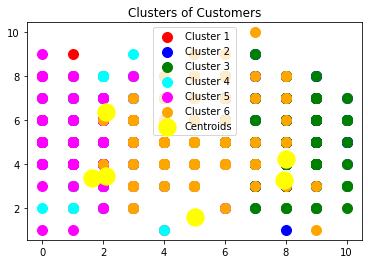

In [49]:
data = readData()
K_Means_library(data)